<a href="https://colab.research.google.com/github/fdafadf/ml/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Regresja liniowa

## Wprowadzenie

Ten rozdział służy intuicyjnemu zrozumieniu czym jest regresja liniowa. Używane są zwroty potoczne, unika się używania formalizmów które pojawią się dopiero w kolejnych rozdziałach.

Celem regresji liniowej jest poszukiwanie takiej prostej która przebiega najbliżej pewnemu zbiorowi punktów. Tak jak to przedstawiono w poniższym przykładzie.

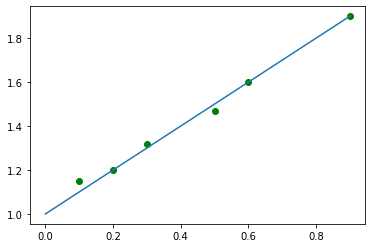

In [19]:
def draw_data_and_line(data, a, b):
  max_x = data[:, 0].max()
  plt.scatter(*data.T, color='green')
  plt.plot([0, max_x], [b, a * max_x + b])
  plt.show()

data = np.array([
  [0.1, 1.15],
  [0.2, 1.2],
  [0.3, 1.32],
  [0.5, 1.47],
  [0.6, 1.6],
  [0.9, 1.9],
])
draw_data_and_line(data, 1, 1)

Aby wiedzieć czy dana prosta lepiej oddaje położenia punktów od innej prostej potrzebujemy sposobu na obliczenie błędu z jakim konkretna prosta odwzorowuje zbiór punktów.

Najczęściej stosowana metoda polega na tym, że dla każdego punktu liczymy jego odległość od prostej w rzucie pionowym. Następnie wszystkie odległości podnosimy do kwadratu i sumujemy. Najlepiej odległości dla wszytkich punktów wynosiły 0. Oznaczało by to, że wszystkie leżą na prostej.

Zdefiniujmy funkcję która liczy błąd dla zbioru punktów i prostej.

In [11]:
def calculate_error(data, a, b):
  return sum(d * d for d in [(a * item[0] + b) - item[1] for item in data]) 

### Metoda 0

Spróbujmy wymyślić od zera metodę wyznaczenia takiej prostej.

$y = ax+b$

Zgodnie z równaniem prostej, szukamy takich wartości $a$ oraz $b$ dla której nasz `calculate_error` będzie możliwie najmniejszy.

Można zauważyć, że dla prostych z parametrem $a=0$ najlepiej dopasowana będzie ta, z parametrem $b$ równym średniej wszystkich $y$ ze zbioru punktów.


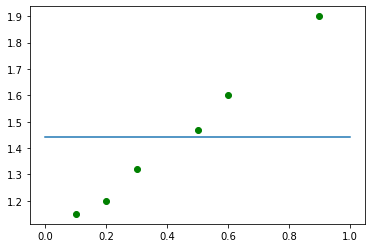

a=0, b=0, error=12.835799999999999
a=0, b=1.4400000000000002, error=0.3942


In [110]:
a = 0
b = data[:, 1].mean()
draw_data_and_line(data, a, b)
print(f"a={0}, b={0}, error={calculate_error(data, 0, 0)}")
print(f"a={a}, b={b}, error={calculate_error(data, a, b)}")

Spróbujmy teraz poprawić parametr $a$. W tym celu zdefiniujmy zbiór prostych podobnych do aktualnej, które różnią się w niewielkim stopniu parametrem $a$. 

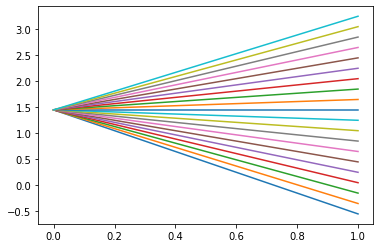

In [111]:
a_search_range = 2
a_step = a_search_range / 10
a_start = a - a_search_range
a_stop = a + a_search_range

for a2 in np.arange(a_start, a_stop, a_step):
  plt.plot([0, 1], [b, a2 + b])

plt.show()

Dla każdej z tych prostych możemy policzyć `calculate_error`.

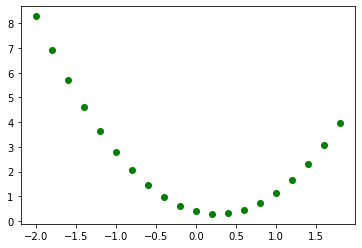

In [112]:
errors_a = np.array([[a2, calculate_error(data, a2, b)] for a2 in np.arange(a_start, a_stop, a_step)])
plt.scatter(*errors_a.T, color='green')
plt.show()

Wybieramy ten parametr który okazał się najlepszy. Oto prosta którą otrzymaliśmy:

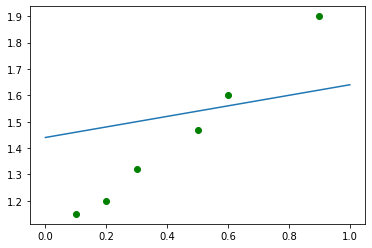

In [113]:
a = errors_a[errors_a[:, 1].argmin()][0]
draw_data_and_line(data, a, b)

W ten sam sposób możemy poprawić parametr $b$. Wyznaczamy zbiór podobnych prostych.

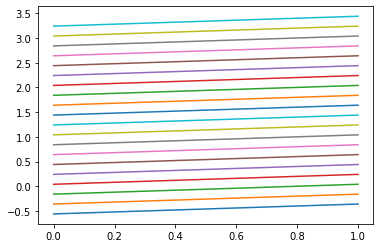

In [114]:
b_search_range = 2
b_step = b_search_range / 10
b_start = b - b_search_range
b_stop = b + b_search_range

for b2 in np.arange(b_start, b_stop, b_step):
  plt.plot([0, 1], [b2, a + b2])

plt.show()

Liczymy błąd dla każdej z nich.

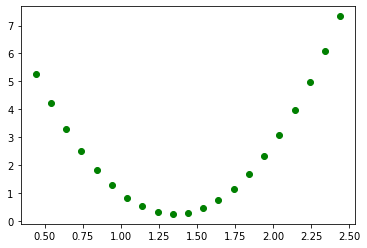

In [115]:
errors_b = np.array([[b2, calculate_error(data, a, b2)] for b2 in np.arange(b - 1, b + 1.01, 0.1)])
plt.scatter(*errors_b.T, color='green')
plt.show()

Wybieramy parametr $b$ z najmniejszym błędem.

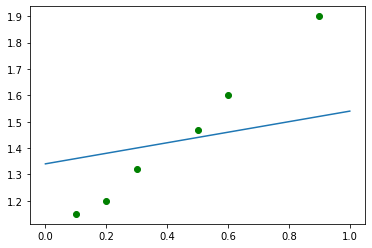

In [116]:
b = errors_b[errors_b[:, 1].argmin()][0]
draw_data_and_line(data, a, b)

Czynności te możemy powtarzać wielokrotnie jeśli prowadzi to do coraz dokłądniejszego wyniku. Możemy również wymyślać modyfikacje tej metody. Przykładowo można stopniowo zmniejszać wartości zmiennych `a_search_range` i `b_search_range`.

Metoda ta, choć wymyślona ad-hoc, przypomina koncepcyjnie przedstawione w dalszych rozdziałach rzeczywiście stosowane podejścia. Na przykład model perceptronu. Ogólnie mówiąc, aktualnie stosowane algorytmy stosują podobne podejścia polegające na iteracyjnym poszukiwaniu coraz lepszych wartości parametrów w pewnym otoczeniu bieżących.

Poniżej przykład w którym 9 razy szukamy coraz lepszych wartości parametrów $a$ i $b$ zaczynając od $a=0$ i $b=0$.

method_0, i=1, a=1.9600000000000035, b=0.6000000000000023, error=0.4443760000000032
method_0, i=2, a=1.6600000000000041, b=0.7200000000000033, error=0.2204560000000026
method_0, i=3, a=1.4600000000000033, b=0.8133333333333368, error=0.11506933333333505
method_0, i=4, a=1.3100000000000036, b=0.8733333333333373, error=0.05840933333333445
method_0, i=5, a=1.206000000000004, b=0.9213333333333377, error=0.030804426666667863
method_0, i=6, a=1.1260000000000057, b=0.9546666666666733, error=0.01582949333333451
method_0, i=7, a=1.0745714285714325, b=0.9718095238095282, error=0.009163566802721321
method_0, i=8, a=1.0445714285714327, b=0.9868095238095285, error=0.006297681088435665
method_0, i=9, a=1.0179047619047674, b=1.0001428571428632, error=0.004445338231292972


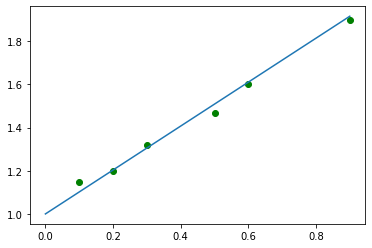

In [46]:
def find_better(c, v, error_fn, range=2):
  step = range / 50
  start = v - range
  stop = v + range
  errors = np.array([[v2, error_fn(c, v2)] for v2 in np.arange(start, stop, step)])
  return errors[errors[:, 1].argmin()]

def find_better_a(data, a, b, i):
  return find_better(b, a, lambda b, a: calculate_error(data, a, b), 2 / i)

def find_better_b(data, a, b, i):
  return find_better(a, b, lambda a, b: calculate_error(data, a, b), 2 / i)

def method_0(data, print_error=False, iterations=10):
  a = 0
  b = 0
  for i in range(1, iterations):
    better = find_better_a(data, a, b, i)
    a = better[0]
    better = find_better_b(data, a, b, i)
    b = better[0]
    if print_error:
      print(f"method_0, i={i}, a={a}, b={b}, error={better[1]}")
  return a, b

a, b = method_0(data, print_error=True)
draw_data_and_line(data, a, b)

Widoczna prosta wydaje się bliska optymalnemu rozwiązaniu. W następnym rozdziale opisana będzie metoda najmniejszych kwadratów która daje optymalny rezultat. Będziemy mogli porównać ten rezultat z optymalnym.

### Zastosowanie

Regresja liniowa może być wykorzystywana do przewidywania prostych (liniowych) zależności. Na przykład możemy spróbować przewidzieć wagę na podstawie wieku osobnika. W tym celu najpierw zbieramy pewną ilość danych.

| Wiek | Waga |
|-----:|-----:|
|    3 |   16 |
|    5 |   22 |
|    5 |   26 |
|    7 |   34 |
|    4 |   21 |

Następnie wyznaczamy prostą za pomocą regresji. Użyjemy tutaj opisanej metody 0.


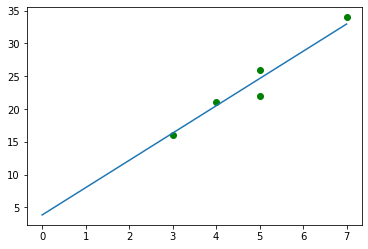

In [38]:
data_age_weight = np.array([
  [3, 16],
  [5, 22],
  [5, 26],
  [7, 34],
  [4, 21],
])
a, b = method_0(data_age_weight)
draw_data_and_line(data_age_weight, a, b)

Możemy teraz przewidywać wagę dla osobników w wieku których nie obserwowaliśmy. Przykładowo: 2, 6, 8.

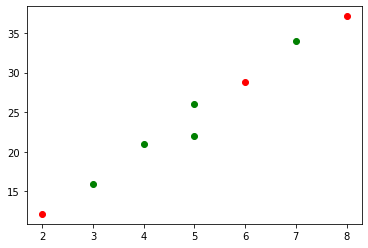

In [25]:
predictions_age_weight = np.array([[x, a * x + b] for x in [2, 6, 8]])
plt.scatter(*data_age_weight.T, color='green')
plt.scatter(*predictions_age_weight.T, color='red')
plt.show()

## Metoda najmniejszych kwadratów

W regresji liniowej często oś $OX$ nazywamy objaśniającą, a oś $OY$ objaśnianą. Oznacza to tyle, że danej wartości $x$ próbujemy przewidzieć wartość $y$.

Aby wyzaczyć prostą regresji posiłkujemy się zbiorem wcześniej zebranych danych. 

$O = \{(x_0, y_0), ..., (x_n, {y}_n)\}$

Wartości ${y}_0$ ... ${y}_n$ to wartości obserwowane dla wartości objaśniających $x_0$ ... $x_n$.

Poniższa prosta koloru niebieskiego, to prosta przy użyciu której staramy się przewidzieć wartości obserwowane. Wartość przewidywana dla $x_i$ oznaczana jest $\hat{y}_i$.





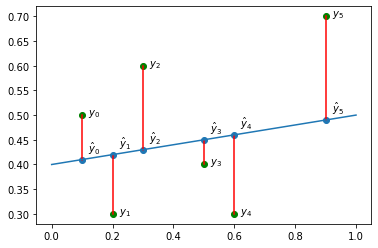

In [28]:
data_1 = np.array([
    [0.1, 0.5],
    [0.2, 0.3],
    [0.3, 0.6],
    [0.5, 0.4],
    [0.6, 0.3],
    [0.9, 0.7],
])
a = 0.1
b = 0.4
for i in range(len(data_1)):
  plt.annotate('  $y_' + str(i) + '$', (data_1[i]))
for x, y in data_1:
  plt.plot([x, x], [a * x + b, y], color='red')
plt.scatter(*data_1.T, color='green')
data_1p = np.array([[x, a * x + b] for [x, y] in data])
plt.scatter(*data_1p.T)
for i in range(len(data_1p)):
  x, y = data_1p[i]
  plt.annotate('  $\hat{y}_' + str(i) + '$', (x, y + 0.015))
plt.plot([0, 1], [b, a + b])
plt.show()

Możemy policzyć błąd objaśniania dla prostej. Jest nim suma kwadratów długości czerwonych odcinków, czyli $\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$.

Szukamy takiej prostej, dla której błąd jest jak najmniejszy, czyli: $ min \sum_{i=1}^{n} (y_i-\hat{y}_i)^2 $.

Stąd nazwa metody najmniejszych kwadratów.

Po przekształceniach $ min \sum_{i=1}^{n} (y_i-\hat{y}_i)^2 $ otrzymujemy wzór na wyliczenie optymalnej prostej:

$ a = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n} (x_i - \overline{x})^2} $

$ b = \overline{y} - a \overline{x} $

Zaimplementujmy metodę najmniejszych kwadratów i porównajmy ją z metodą 0.

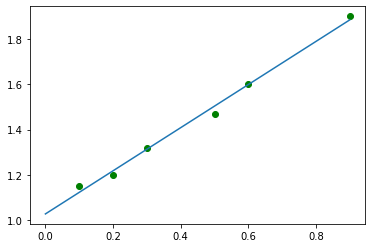

Błąd metody 0: 0.0024832411937421015


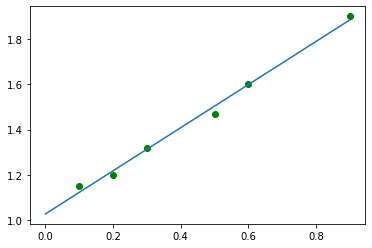

Błąd metody najmniejszych kwadratów: 0.0024830769230769125


In [50]:
def least_squares(data):
  x_mean = data[:, 0].mean()
  y_mean = data[:, 1].mean()
  x_diffs = [a[0] - x_mean for a in data]
  y_diffs = [a[1] - y_mean for a in data]
  x_squares = [a * a for a in x_diffs]
  a = sum([a[0] * a[1] for a in zip(x_diffs, y_diffs)]) / sum(x_squares)
  b = y_mean - a * x_mean
  return a, b

a, b = method_0(data, iterations=50)
draw_data_and_line(data, a, b)
print(f'Błąd metody 0: {calculate_error(data, a, b)}')

a, b = least_squares(data)
draw_data_and_line(data, a, b)
print(f'Błąd metody najmniejszych kwadratów: {calculate_error(data, a, b)}')

Widzimy, że *metoda 0* przy 50 iteracjach daje wynik bardzo zbliżony do optymalnego. Trzeba jednak zaznaczyć, że bardziej złożona obliczeniowo.

# Perceptron

## Wprowadzenie

## Regresja liniowa

# Sieci neuronowe

## Wprowadzenie

## Biblioteka `torch`

# Procesy decyzyjne Markova

# Programowanie dynamiczne

# Q Learning

# AI gra na atari

## Microsoft Azure